<a href="https://colab.research.google.com/github/PaulToronto/DataCamp---Keras-Fundamentals---4-Courses/blob/main/1_3_Improving_Your_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3 - Improving Your Model Performance

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

## Learning curves

- Learning curves provide a lot of information about your model
- So far, we've seen two types:
    1. Loss curve
        - <img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/loss_curve.png'/>
        - tends to decrease as epochs go by
        - this is expected since our model is learning to minimize loss
        - afer a certain number of epochs, the value converges and we've arrived at a minimum
    2. Accuracy curve
        - <img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/accuracy_curve.png'/>
        - accuracy tends to increase as epochs go by
        - this shows that the model makes fewer mistakes as it learns
- Overfitting
    - <img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/overfitting.png'/>
    - Overfitting is when our model starts learning particularities of our training data which don't generalize well on unseen data
        - The early stopping callback is useful to stop our model before it starts overfitting
    - If we plot training vs validation data we can identify overfitting
    - The training and validation curves start to diverge
- Unstable curves
    - <img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/unstable_curve.png'/>
    - Not all curves are smooth and pretty
    - There are many reasons that can lead to unstable learning curves:
        - the chosen optimizer
        - learning rate
        - batch size
        - network architecture
        - weight initialization
        - ...
    - All these parameters can be tuned
- Can we benefit from more data?
    - Neural networks are well known for surpassing traditional machine learning techniquss as the amount of data increases
    - We can check whether collecting more data would increase a model's generalization and accuracy     
- We aim at producing a graph like this one, where we have fitted our model with increasing amounts of training data
    - <img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/aim.png'/>
    - If, after using all our data, we see that our test still has a tendency to improve (meaning it's not parallet to our training set curve and it's increasing), then it's worth it to gather more data if possible to allow the model to keep learning
        - <img src='https://raw.githubusercontent.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/main/images/still_increasing.png'/>
- Code for creating a graph like the previous one:

```python
# Store initial model weights
init_weights = model.get_weights()

# Lists for storing accuracies
train_accs = []
tests_accs = []

# loop over a predetermined list of train sized and
# for each train size we get the corresponding training data fraction
for train_size in train_sizes:
    # Split a fraction according to train_size
    X_train_frac, _, y_train_frac, _ = train_test_split(X_train,
                                                        y_train,
                                                        train_size=train_size)
    # make sure our model starts with the same set of weights
    model.set_weights(initial_weights)
    model.fit(X_train_frac,
              y_train_frac,
              epochs=100,
              verbose=0,
              callbacks=[EarlyStopping(monintor='loss', patience=1)])
    # Get the accuracy for this training set fraction
    train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)
    # Get the accuracy on the whole test set
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)
    print('Done with size: ', train_size)
```


### Learning the digits

#### The Data

The files `digits_pixels.npy` and `digits_target.npy` can be downloaded via these two links:

https://github.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/raw/main/data/Digits/digits_pixels.npy

https://github.com/PaulToronto/DataCamp---Introduction-to-Deep-Learning-with-Keras/raw/main/data/Digits/digits_target.npy

I stored them in my Google Drive and I am reading them directly from there. I don't think it is possible to read *.npy files directly from GitHub because the files start downloading automatically when I call `np.load()`

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/Colab Notebooks/Data Science/Mars-Seluna/'
file_path += 'DataCamp - Keras Fundamentals - 4 Courses/'
file_path += 'digits_pixels.npy'


X_original = np.load(file_path)

file_path = '/content/drive/My Drive/Colab Notebooks/Data Science/Mars-Seluna/'
file_path += 'DataCamp - Keras Fundamentals - 4 Courses/'
file_path += './digits_target.npy'

y_original = np.load(file_path)

In [4]:
X_original.shape, X_original

((1797, 64),
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]))

In [5]:
y_original.shape, y_original

((1797,), array([0, 1, 2, ..., 8, 9, 8]))

In [6]:
np.unique(y_original)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# y needs to be one-hot encoded

#from tensorflow.keras.utils import to_categorical
y = to_categorical(y_original)
y.shape, y

((1797, 10),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.]]))

In [8]:
# `shuffle=True` is the default, this particular dataset needs to be shuffled
X_train, X_test, y_train, y_test = train_test_split(X_original,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257, 10), (540, 10))

#### Visualize digit

The label is:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]  :  3


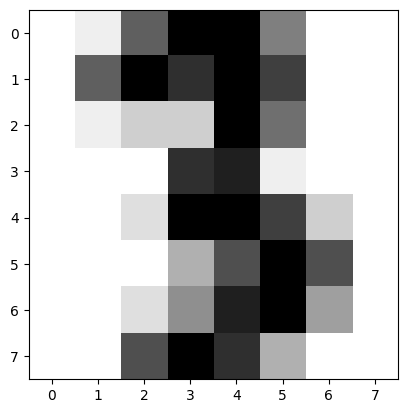

In [9]:
def viz_digit(digits, index):
    digit = digits[index].reshape(8, 8)
    plt.imshow(digit, cmap='gray_r')

def get_label(target, index):
    label = target[index]
    return np.argmax(label)

print('The label is: ', y_train[0], ' : ', get_label(y_train, 0))
viz_digit(X_train, 0)

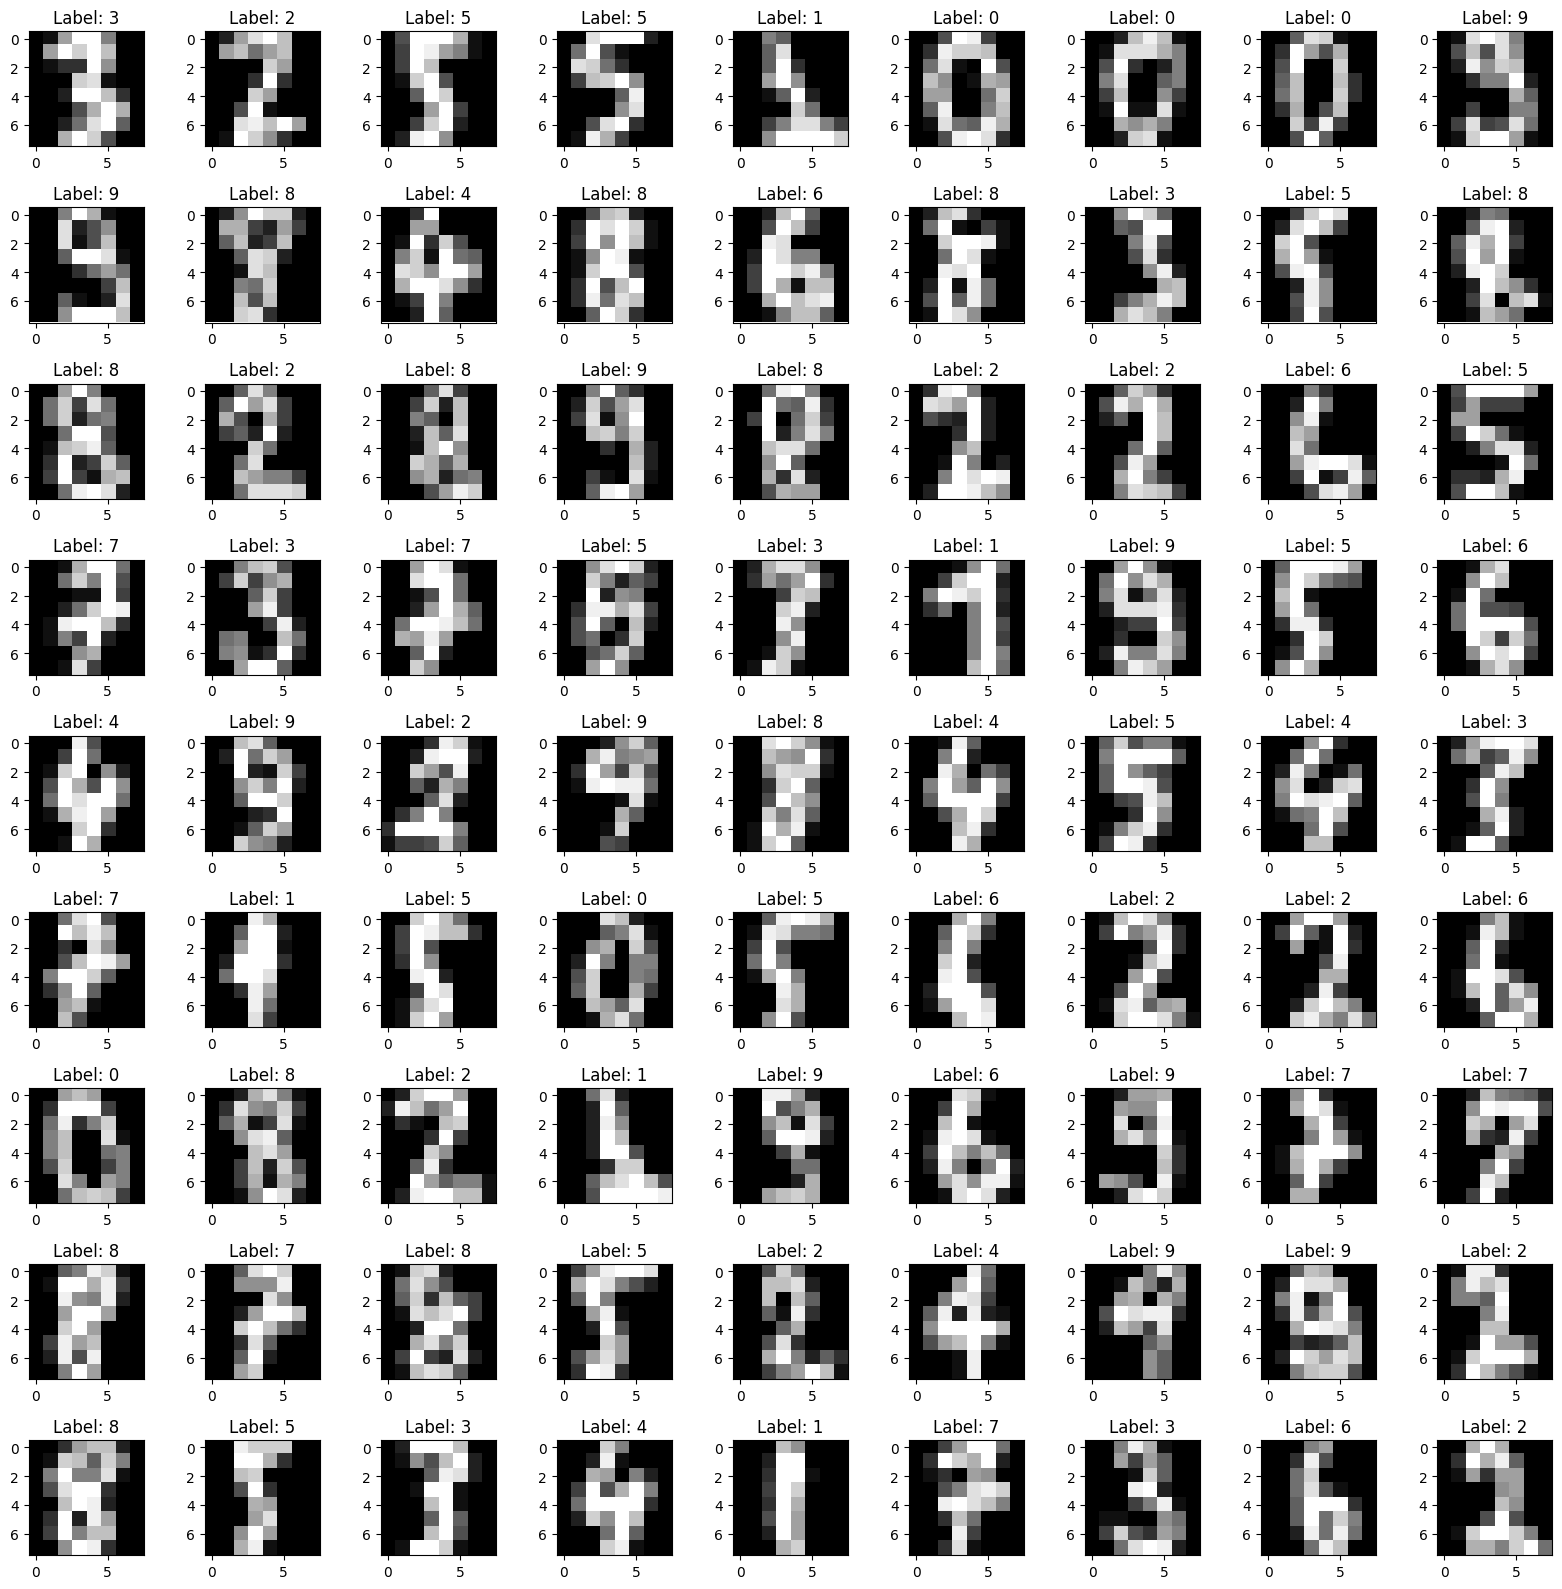

In [10]:
fig, axes = plt.subplots(9, 9, figsize=(16, 16))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i].reshape(8, 8), cmap='gray')
    ax.set_title('Label: ' + str(get_label(y_train, i)))

plt.tight_layout()

#### Build and compile the model

In [11]:
model = Sequential()

# Input layer
model.add(Input(shape=(64,)))

# Hidden layer
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,210 (4.73 KB)

 Trainable params: 1,210 (4.73 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compile your model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Test that model is well assembled
#. by predicting before training
model.predict(X_train)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[2.7238941e-05, 2.3683423e-12, 9.9988014e-01, ..., 9.2514543e-05,
        2.9080887e-14, 3.7651940e-13],
       [3.5603445e-03, 6.7907181e-06, 8.1261361e-01, ..., 1.8381722e-01,
        1.4606272e-10, 1.7835816e-08],
       [5.0641393e-06, 1.0525257e-06, 3.5513093e-04, ..., 9.9962014e-01,
        6.1837596e-10, 2.3797970e-08],
       ...,
       [1.0189958e-01, 2.7667387e-05, 8.9225703e-01, ..., 5.7365135e-03,
        3.1111092e-06, 2.1867656e-07],
       [2.7361038e-04, 5.9929766e-07, 4.5831761e-01, ..., 5.4034901e-01,
        8.2894167e-07, 3.9572265e-07],
       [5.3906674e-03, 2.9176745e-09, 9.9460560e-01, ..., 3.6864737e-06,
        2.3653222e-08, 2.3377139e-10]], dtype=float32)

#### Is the model overfitting?

In [13]:
# Train your model for 60 epochs, using X_test and y_test as validation data
h_callback = model.fit(X_train,
                       y_train,
                       epochs=60,
                       validation_data = (X_test, y_test),
                       verbose=0)

In [14]:
h_callback.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

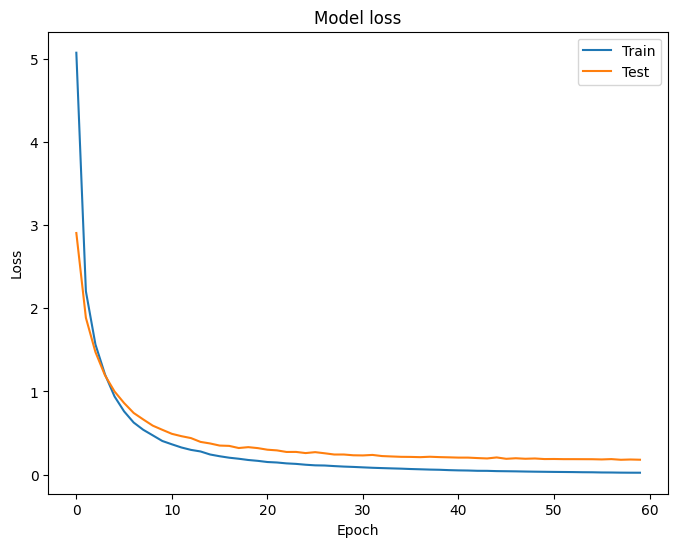

In [15]:
plt.figure(figsize=(8, 6))

plt.plot(h_callback.history['loss'], label='Train')
plt.plot(h_callback.history['val_loss'], label='Test')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend();

- The model is not overfitting becazuse the test loss is not getting higher as the epochs go by

#### Do we need more data?

In [27]:
training_sizes = np.array([ 125,  502,  879, 1255])
initial_weights = model.weights

In [28]:
for size in training_sizes:
    pass